In [14]:
import pandas as pd
data2= pd.read_csv("/kaggle/input/testth2/Gia SMP va SMPcap 2021(Gi th trng SMP).csv",encoding='latin-1')
data= data2[['Ngày','7','8','9']]
data

,Ngày,7,8,9
0,1/1/2021,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.1
4,1/5/2021,1061.5,1061.5,1061.5
...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6


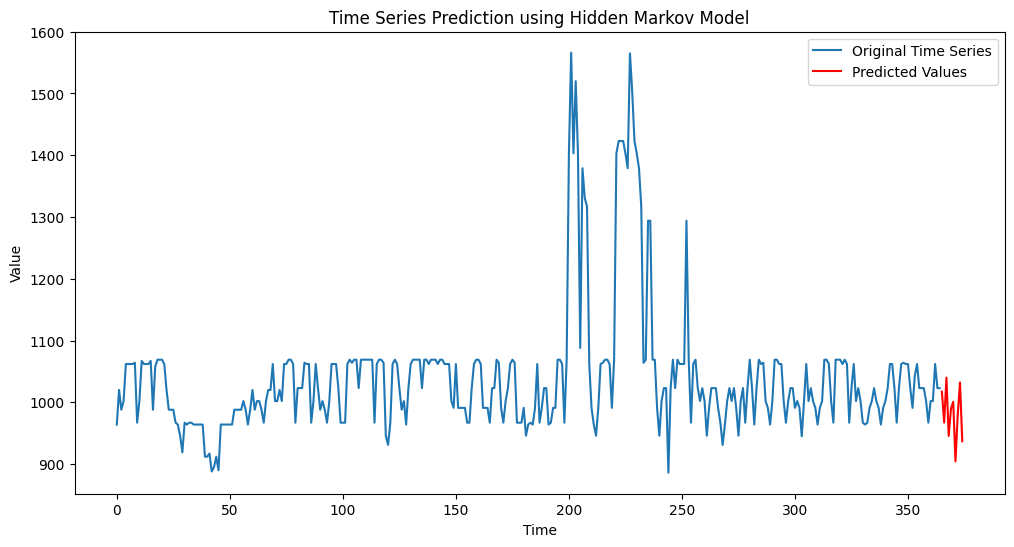

In [17]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# Chọn cột đầu tiên của giá trị làm chuỗi thời gian
time_series = data["7"].values

# Chuyển đổi chuỗi thời gian thành định dạng mà HMM có thể sử dụng
# HMM yêu cầu dữ liệu phải ở định dạng số nguyên, nên chúng ta sẽ làm tròn các giá trị
time_series = np.round(time_series).astype(int).reshape(-1, 1)

# Khởi tạo mô hình HMM với số lượng trạng thái ẩn
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(time_series)

# Dự báo giá trị tương lai
# Số lượng bước dự báo
n_steps = 10

# Sử dụng trạng thái cuối cùng để dự báo giá trị tương lai
last_value = time_series[-1].reshape(1, -1)
predictions = []

for _ in range(n_steps):
    next_value = model.sample(1)[0]
    predictions.append(next_value[0])
    last_value = next_value

# Vẽ biểu đồ chuỗi thời gian gốc và giá trị dự báo
plt.figure(figsize=(12, 6))
plt.plot(range(len(time_series)), time_series, label="Original Time Series")
plt.plot(range(len(time_series), len(time_series) + n_steps), predictions, label="Predicted Values", color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series Prediction using Hidden Markov Model")
plt.show()

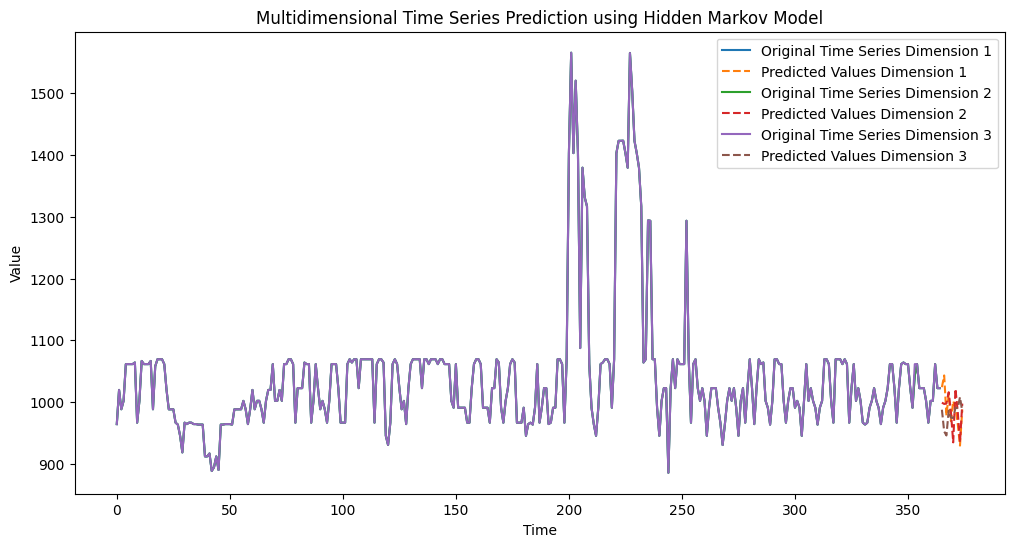

In [18]:
time_series = data.drop(columns=['Ngày']).values
# Khởi tạo mô hình HMM với số lượng trạng thái ẩn
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(time_series)

# Dự báo giá trị tương lai
# Số lượng bước dự báo
n_steps = 10

# Sử dụng trạng thái cuối cùng để dự báo giá trị tương lai
last_values = time_series[-1].reshape(1, -1)
predictions = []

for _ in range(n_steps):
    next_values = model.sample(1)[0]
    predictions.append(next_values[0])
    last_values = next_values

# Chuyển đổi danh sách các dự báo thành mảng numpy
predictions = np.array(predictions)

# Vẽ biểu đồ chuỗi thời gian gốc và giá trị dự báo cho từng chiều
plt.figure(figsize=(12, 6))
for i in range(time_series.shape[1]):
    plt.plot(range(len(time_series)), time_series[:, i], label=f"Original Time Series Dimension {i+1}")
    plt.plot(range(len(time_series), len(time_series) + n_steps), predictions[:, i], label=f"Predicted Values Dimension {i+1}", linestyle='--')

plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Multidimensional Time Series Prediction using Hidden Markov Model")
plt.show()